# Atividade 5 - Avaliação dos Modelos

## Disciplina de Machine Learning

## Prof. Me. Fernando Sequeira Sousa


Coordenador: Larissa Ionafa RA: 1903166

Secretário: Lucas da Silva Santos RA: 1904209

Orador: Arthur Vinicius Santos Silva RA: 1903665

## Tratamento de dados referente AC3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/exodia-impacta/7 Semestre/Machine Learning/Hydra/AC03/Car_Insurance_Claim.csv')

In [ ]:
# Descartar registros que não serão utilizados? - OK
# Não foram removidos registros porque foi identificado que a base não possui dados inconsistente, e os registros que possuem dados nulos,
# são de colunas que serão removidas posteriormente.
dados

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
# Descartar atributos irrelevantes definidos no entendimento dos dados - OK
dados = dados.drop(columns=['CREDIT_SCORE', 'RACE', 'ID'])
dados

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,0-9y,none,poverty,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,0-9y,high school,working class,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,0-9y,university,working class,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,10-19y,none,working class,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,10-19y,university,upper class,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,10-19y,none,middle class,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,0-9y,high school,middle class,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,10-19y,high school,poverty,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


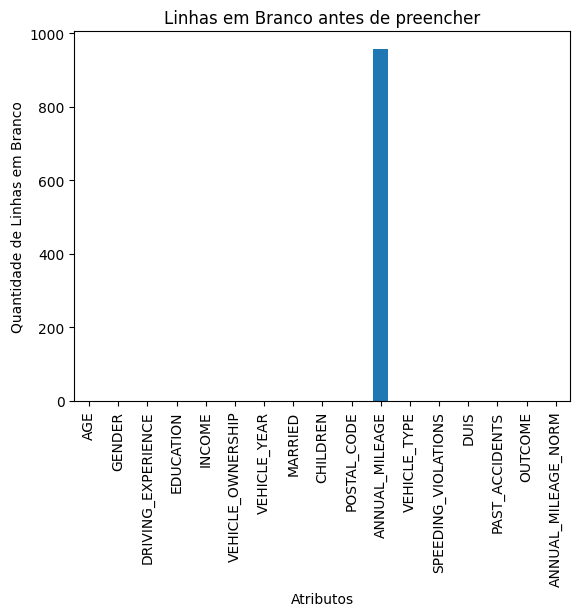

In [ ]:
# Preencher dados ausentes (missing values), de acordo com alguma estratégia - OK

# Substituindo os valores nulos pela média
dados["ANNUAL_MILEAGE_NORM"] = dados["ANNUAL_MILEAGE"].apply(lambda x: dados["ANNUAL_MILEAGE"].mean() if np.isnan(x) else x) 

nulos_pre_tratamento = dados.isna().sum(axis=0)
plt.figure()
nulos_pre_tratamento.plot(kind='bar')
plt.ylabel('Quantidade de Linhas em Branco')
plt.xlabel('Atributos')
plt.title('Linhas em Branco antes de preencher')
plt.show()

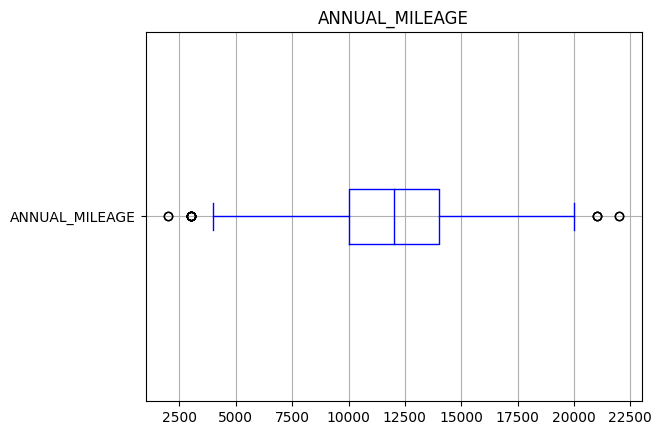

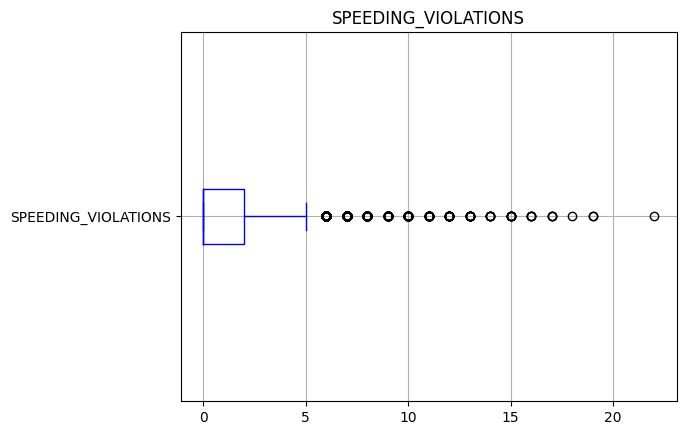

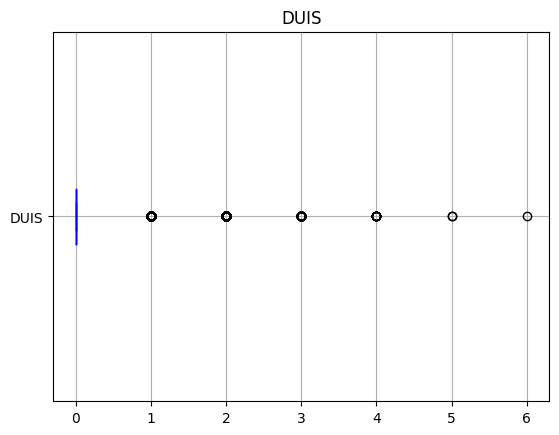

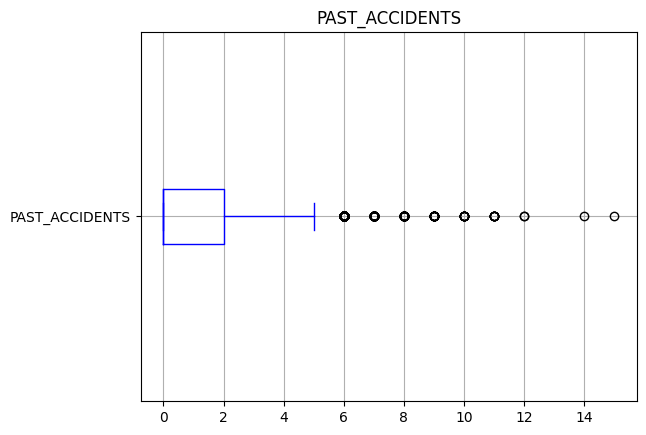

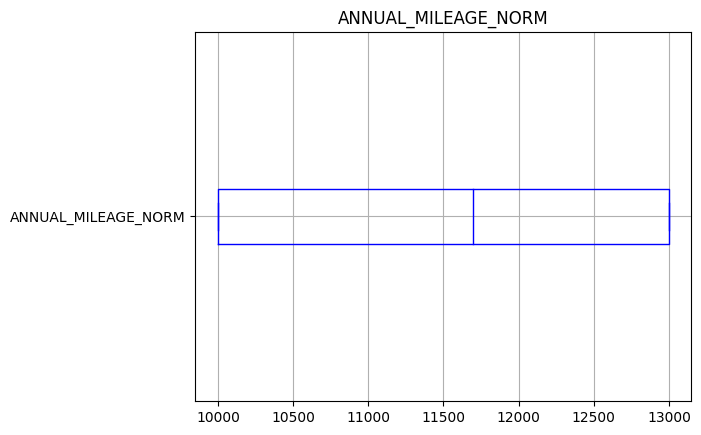

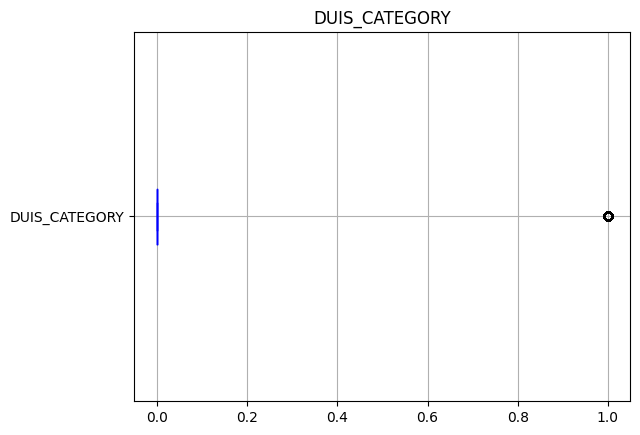

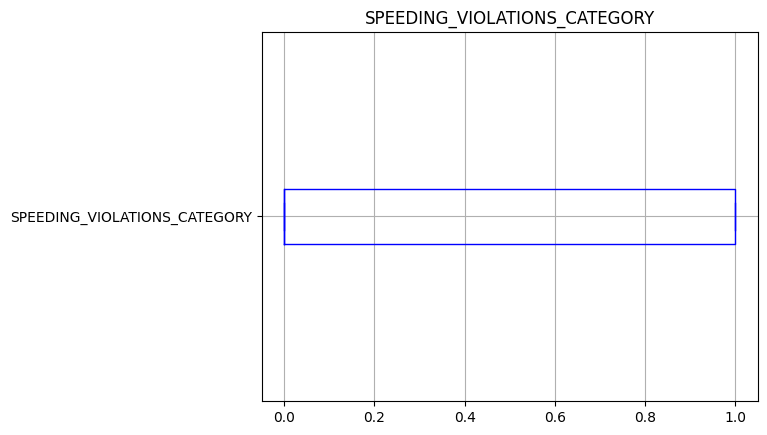

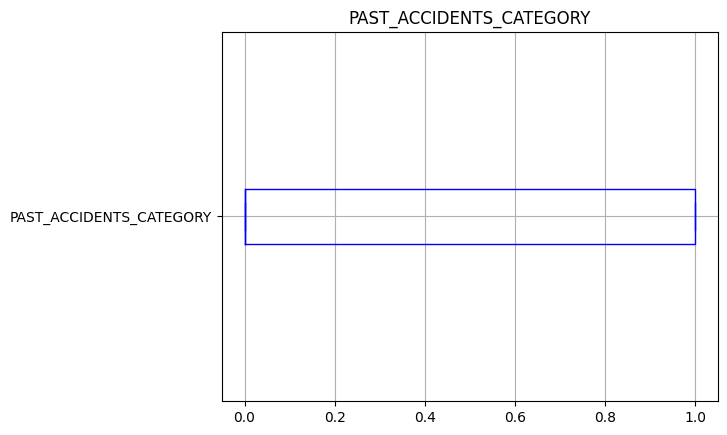

In [ ]:
# Tratar dados que podem estar errados e outliers - OK
def duis_encoder(x):
    if (x == 0):
        return 0
    else:
        return 1

def speeding_violation_encoder(x):
    if (x == 0):
        return 0
    else:
        return 1

def past_accidents_encoder(x):
    if (x == 0):
        return 0
    else:
        return 1

dados["DUIS_CATEGORY"] = dados["DUIS"].apply(duis_encoder)
dados["SPEEDING_VIOLATIONS_CATEGORY"] = dados["SPEEDING_VIOLATIONS"].apply(speeding_violation_encoder)
dados["PAST_ACCIDENTS_CATEGORY"] = dados["PAST_ACCIDENTS"].apply(past_accidents_encoder)


colunas_invalidas = ["GENDER", "AGE", "EDUCATION", "DRIVING_EXPERIENCE", "INCOME", "VEHICLE_YEAR", "VEHICLE_TYPE", "VEHICLE_OWNERSHIP", "MARRIED" ,"CHILDREN", "OUTCOME", \
                     "POSTAL_CODE"]


#substituindo outliers pelo valor máximo e mínimo de uma coluna
def remove_outlier(nome_coluna):
  Q1 = dados[nome_coluna].quantile(0.25)
  Q3 = dados[nome_coluna].quantile(0.75)
  # substituir os valores menores que o máximo 
  dados[nome_coluna] = dados[nome_coluna].apply(lambda x: Q1 if x < Q1 else x) # mínimo

  # substituir idade maior que 76 por 76
  dados[nome_coluna] = dados[nome_coluna].apply(lambda x: Q3 if x > Q3 else x) # máximo


# Removendo Outliers da coluna ANNUAL_MILEAGE_NORM
remove_outlier("ANNUAL_MILEAGE_NORM")

#Printar Boxplot de cada coluna
for coluna in dados.columns:

  if(coluna not in colunas_invalidas):
    dados[coluna].plot.box(color='blue', vert=False, grid=True)
    plt.title(coluna)
    plt.show()


In [ ]:
# Criar novos atributos a partir dos existentes, caso seja necessário - OK
# não será criado!!!!

# removendo atributos já convertidos


In [ ]:
# Transformar atributos qualitativos em quantitativos (dummies) - OK

def age_encoder(x):
    if (x == "65+"):
        return 3
    elif (x == "40-64"):
        return 2
    elif (x == "26-39"):
        return 1
    else:
        return 0
    

def gender_encoder(x):
    if (x == "male"):
        return 0
    elif (x == "female"):
        return 1
    

def race_encoder(x):
    if (x == "majority"):
        return 0
    elif (x == "minority"):
        return 1


def driving_experience_encoder(x):
    if (x == "0-9y"):
        return 0
    elif (x == "10-19y"):
        return 1
    elif (x == "20-29y"):
        return 2
    else:
        return 3

def education_encoder(x):
    if (x == "high school"):
        return 0
    elif (x == "none"):
        return 1
    else:
        return 2

def income_encoder(x):
    if (x == "upper class"):
        return 0
    elif (x == "poverty"):
        return 1
    elif (x == "working class"):
        return 2
    else:
        return 3

def vehicle_year_encoder(x):
    if (x == "after 2015"):
        return 0
    else:
        return 1

def vehicle_type_encoder(x):
    if (x == "sedan"):
        return 0
    else:
        return 1        

dados = dados.loc[: , dados.columns != 'ID']
dados["AGE_CATEGORY"] = dados["AGE"].apply(age_encoder)
dados["GENDER_CATEGORY"] = dados["GENDER"].apply(gender_encoder)
dados["DRIVING_EXPERIENCE_CATEGORY"] = dados["DRIVING_EXPERIENCE"].apply(driving_experience_encoder)
dados["EDUCATION_CATEGORY"] = dados["EDUCATION"].apply(education_encoder)
dados["INCOME_CATEGORY"] = dados["INCOME"].apply(income_encoder)
dados["VEHICLE_YEAR_CATEGORY"] = dados["VEHICLE_YEAR"].apply(vehicle_year_encoder)
dados["VEHICLE_TYPE_CATEGORY"] = dados["VEHICLE_TYPE"].apply(vehicle_type_encoder)

In [ ]:
dados.dtypes

AGE                              object
GENDER                           object
DRIVING_EXPERIENCE               object
EDUCATION                        object
INCOME                           object
VEHICLE_OWNERSHIP               float64
VEHICLE_YEAR                     object
MARRIED                         float64
CHILDREN                        float64
POSTAL_CODE                       int64
ANNUAL_MILEAGE                  float64
VEHICLE_TYPE                     object
SPEEDING_VIOLATIONS               int64
DUIS                              int64
PAST_ACCIDENTS                    int64
OUTCOME                         float64
ANNUAL_MILEAGE_NORM             float64
DUIS_CATEGORY                     int64
SPEEDING_VIOLATIONS_CATEGORY      int64
PAST_ACCIDENTS_CATEGORY           int64
AGE_CATEGORY                      int64
GENDER_CATEGORY                   int64
DRIVING_EXPERIENCE_CATEGORY       int64
EDUCATION_CATEGORY                int64
INCOME_CATEGORY                   int64


In [ ]:
# Normalizar atributos quantitativos

# foi identificado que a única coluna possivel de normalização é o ANNUAL_MILEAGE_NORM

def normalizado_colunas_quantitativas(nome_coluna):
  Q1 = dados[nome_coluna].quantile(0.25)
  Q3 = dados[nome_coluna].quantile(0.75)
  # normalizando os dados entre 0 e 1
  dados[nome_coluna] = dados[nome_coluna].apply(lambda x: (x-Q1)/(Q3-Q1))

normalizado_colunas_quantitativas("ANNUAL_MILEAGE_NORM")

In [ ]:
# Transforma o atributo Tamanho em dummies
dummies = pd.get_dummies(dados["AGE_CATEGORY"], prefix="AGE_CATEGORY")

# Concatena os dummies com o DataFrame original
dados = pd.concat([dados, dummies], axis=1)

In [ ]:
# Transforma o atributo Tamanho em dummies
dummies = pd.get_dummies(dados["DRIVING_EXPERIENCE_CATEGORY"], prefix="DRIVING_EXPERIENCE_CATEGORY")

# Concatena os dummies com o DataFrame original
dados = pd.concat([dados, dummies], axis=1)

In [ ]:
# Transforma o atributo Tamanho em dummies
dummies = pd.get_dummies(dados["INCOME_CATEGORY"], prefix="INCOME_CATEGORY")

# Concatena os dummies com o DataFrame original
dados = pd.concat([dados, dummies], axis=1)

In [ ]:
# Transforma o atributo Tamanho em dummies
dummies = pd.get_dummies(dados["EDUCATION_CATEGORY"], prefix="EDUCATION_CATEGORY")

# Concatena os dummies com o DataFrame original
dados = pd.concat([dados, dummies], axis=1)

In [ ]:
dados = dados.drop(columns=['DRIVING_EXPERIENCE_CATEGORY', 'INCOME_CATEGORY', 'EDUCATION_CATEGORY', 'AGE_CATEGORY'])

In [ ]:
# Transformar o alvo, caso seja necessário (normalizar ou transformar as categorias em números) - OK
dados.ANNUAL_MILEAGE_NORM

0       0.666667
1       1.000000
2       0.333333
3       0.333333
4       0.666667
          ...   
9995    1.000000
9996    0.565668
9997    1.000000
9998    1.000000
9999    1.000000
Name: ANNUAL_MILEAGE_NORM, Length: 10000, dtype: float64

In [ ]:
# Crie dois conjuntos: 70% para treinamento e 30% para testes

# atributos
colunas = list(dados.columns)
print(colunas)
# indice ddados.columnso alvo
idx_alvo = colunas.index('OUTCOME')
# selecionar atributos depois do alvo - atributos preparados anteriormente
X = dados.iloc[:, idx_alvo+1:]
# selecionar ALVO
y = dados['OUTCOME']

# separação treinamento e testes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 88, stratify=y)


['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'ANNUAL_MILEAGE_NORM', 'DUIS_CATEGORY', 'SPEEDING_VIOLATIONS_CATEGORY', 'PAST_ACCIDENTS_CATEGORY', 'GENDER_CATEGORY', 'VEHICLE_YEAR_CATEGORY', 'VEHICLE_TYPE_CATEGORY', 'AGE_CATEGORY_0', 'AGE_CATEGORY_1', 'AGE_CATEGORY_2', 'AGE_CATEGORY_3', 'DRIVING_EXPERIENCE_CATEGORY_0', 'DRIVING_EXPERIENCE_CATEGORY_1', 'DRIVING_EXPERIENCE_CATEGORY_2', 'DRIVING_EXPERIENCE_CATEGORY_3', 'INCOME_CATEGORY_0', 'INCOME_CATEGORY_1', 'INCOME_CATEGORY_2', 'INCOME_CATEGORY_3', 'EDUCATION_CATEGORY_0', 'EDUCATION_CATEGORY_1', 'EDUCATION_CATEGORY_2']


In [ ]:
X_train.dtypes

ANNUAL_MILEAGE_NORM              float64
DUIS_CATEGORY                      int64
SPEEDING_VIOLATIONS_CATEGORY       int64
PAST_ACCIDENTS_CATEGORY            int64
GENDER_CATEGORY                    int64
VEHICLE_YEAR_CATEGORY              int64
VEHICLE_TYPE_CATEGORY              int64
AGE_CATEGORY_0                     uint8
AGE_CATEGORY_1                     uint8
AGE_CATEGORY_2                     uint8
AGE_CATEGORY_3                     uint8
DRIVING_EXPERIENCE_CATEGORY_0      uint8
DRIVING_EXPERIENCE_CATEGORY_1      uint8
DRIVING_EXPERIENCE_CATEGORY_2      uint8
DRIVING_EXPERIENCE_CATEGORY_3      uint8
INCOME_CATEGORY_0                  uint8
INCOME_CATEGORY_1                  uint8
INCOME_CATEGORY_2                  uint8
INCOME_CATEGORY_3                  uint8
EDUCATION_CATEGORY_0               uint8
EDUCATION_CATEGORY_1               uint8
EDUCATION_CATEGORY_2               uint8
dtype: object

In [ ]:
# Usar dois algoritmos de seleção de atributos no conjunto de treinamento para gerar 4 bases com quantidades de atributos diferentes

#Metodo 1 - RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
selected = RFE(model, step=1, n_features_to_select=5).fit(X_train, y_train)
colunas_selecionadas = [X_train.columns[i] for i, c in enumerate(selected.support_) if c]

X_train2_RFE, X_test2_RFE = X_train[colunas_selecionadas], X_test[colunas_selecionadas]

# Metodo 2 - SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
selected = SelectKBest(chi2, k=5).fit(X_train, y_train)
X_train2_Kbest, X_test2_Kbest = X_train[selected.get_feature_names_out()], X_test[selected.get_feature_names_out()]


In [ ]:
# # Caso o o atributo alvo esteja desbalanceado, use alguma estratégia de oversampling ou undersampling no conjunto de treinamento para gerar a base de treinamento final

# X_train['OUTCOME'] = y_train
# X_test['OUTCOME'] = y_test

# # realizando balancemaneto da base de treinamento
# valor_0,valor_1 = X_train.OUTCOME.value_counts()
# c3 = X_train[X_train['OUTCOME'] == 0 ]
# c1 = X_train[X_train['OUTCOME'] == 1]
# df_3 = c3.sample(valor_1)
# X_train = pd.concat([df_3,c1],axis=0)

In [ ]:
# # salvar conjuntos

# X_train.to_csv('/content/drive/MyDrive/exodia-impacta/7 Semestre/Machine Learning/Hydra/AC03/Car_Insurance_Claim_train.csv', index=False)
# X_test.to_csv('/content/drive/MyDrive/exodia-impacta/7 Semestre/Machine Learning/Hydra/AC03/Car_Insurance_Claim_teste.csv', index=False)

# Atividade Continua 04

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# criando um objeto LinearRegression
model = LinearRegression()

# treinando o modelo com o conjunto de treinamento
model.fit(X_train, y_train)

# fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")
print(f"mape: {mape}")

mae: 0.28823111979166666
mse: 0.1344075050354004
rmse: 0.36661629128477147
r2: 0.3753007925435843
mape: 690463981933254.0


Com base nos resultados apresentados, podemos concluir o seguinte:

O valor do MAE indica que o modelo, em média, tem um erro absoluto de 0,288. Isso significa que, em média, as previsões estão a cerca de 0,288 unidades de distância dos valores reais.

O valor do MSE é 0,134, o que indica que o modelo tem um erro quadrático médio relativamente baixo.

O RMSE é 0,367, o que indica que o modelo tem um erro médio de cerca de 0,367 unidades.

O valor do R2 é 0,375, o que indica que o modelo explica cerca de 37,5% da variação nos dados de saída.

O valor do MAPE é extremamente alto, indicando que o modelo não é bom em fazer previsões precisas e não é recomendado para uso prático. O MAPE de 690463981933254.0 sugere que as previsões estão fora de proporção em relação aos valores reais. Isso pode ser um indicativo de que o modelo precisa de mais dados para treinamento ou que o modelo não é adequado para o conjunto de dados em questão.

Portanto, embora o modelo pareça ter um desempenho razoável em termos de MSE, RMSE e R2, o MAPE indica que ele não é preciso o suficiente para ser usado na prática.

### KNN - KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Revocação:", recall_score(y_test, y_pred))

Acurácia: 0.8083333333333333
Matriz de confusão:
 [[1837  223]
 [ 352  588]]
Precisão: 0.7250308261405672
Revocação: 0.625531914893617


Esses resultados indicam que o modelo teve uma acurácia de 80,83%, o que significa que ele classificou corretamente 80,83% de todas as amostras. A matriz de confusão mostra que o modelo classificou corretamente 1837 amostras como verdadeiras positivas (TP) e 588 amostras como verdadeiras negativas (TN), mas errou em 223 amostras, classificando-as como falsas negativas (FN) e em 352 amostras, classificando-as como falsas positivas (FP).

A precisão do modelo foi calculada em 72,50%, o que indica que, das amostras classificadas como positivas pelo modelo, 72,50% foram realmente positivas e 27,50% foram classificadas incorretamente como positivas. A revocação, por outro lado, foi de 62,55%, o que indica que o modelo foi capaz de detectar 62,55% de todas as amostras positivas.

Em geral, esses resultados indicam que o modelo teve um desempenho razoavelmente bom, mas ainda há espaço para melhorias. Uma precisão mais alta seria desejável para reduzir o número de falsos positivos e uma revocação mais alta para reduzir o número de falsos negativos. Além disso, a análise adicional das amostras classificadas incorretamente pode fornecer insights úteis para aprimorar o modelo.

### Naive Byes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Revocação:", recall_score(y_test, y_pred))


Acurácia: 0.7693333333333333
Matriz de confusão:
 [[1558  502]
 [ 190  750]]
Precisão: 0.5990415335463258
Revocação: 0.7978723404255319



Com base nos resultados obtidos com o algoritmo Naive Bayes, pode-se concluir que a acurácia do modelo foi de 0.769, ou seja, ele acertou cerca de 77% das classificações. A matriz de confusão mostra que o modelo classificou corretamente 1558 casos como não acionamento do seguro e 750 casos como acionamento do seguro, porém ele classificou incorretamente 502 casos como acionamento do seguro quando na verdade não houve acionamento e 190 casos como não acionamento do seguro quando na verdade houve acionamento.

A precisão do modelo foi de 0.599, o que significa que das classificações positivas (acionamento do seguro), cerca de 60% realmente eram positivas. Já a revocação foi de 0.798, ou seja, o modelo foi capaz de identificar corretamente cerca de 80% dos casos que realmente eram positivos.

Em geral, pode-se dizer que o modelo teve um desempenho razoável, mas ainda há espaço para melhorias, principalmente na redução dos falsos positivos (casos em que o modelo classificou incorretamente como acionamento do seguro quando na verdade não houve acionamento).

### Perceptron 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# instanciando o modelo Perceptron
perceptron = Perceptron(penalty='elasticnet')

# treinando o modelo
perceptron.fit(X_train, y_train)

# fazendo previsões com os dados de teste
y_pred = perceptron.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Revocação:", recall_score(y_test, y_pred))

Acurácia: 0.772
Matriz de confusão:
 [[1897  163]
 [ 521  419]]
Precisão: 0.7199312714776632
Revocação: 0.44574468085106383



Com base nos resultados da análise do modelo Perceptron, pode-se concluir que a acurácia do modelo é razoável, mas pode ser melhorada. A matriz de confusão indica que o modelo tem uma tendência a classificar a maioria das observações como negativas. Isso pode ser evidenciado pelo alto número de verdadeiros negativos e o baixo número de falsos positivos. Por outro lado, o modelo tem um desempenho inferior em relação aos falsos negativos, ou seja, a proporção de casos positivos que foram erroneamente classificados como negativos é relativamente alta. Além disso, a precisão e a revocação do modelo também indicam que há espaço para melhorias, pois a precisão é relativamente alta, mas a revocação é relativamente baixa.

### Multi Layer Perceptron - MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


# instanciar o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000, learning_rate_init=0.08, batch_size=77, random_state = 88)

# treinar o modelo
mlp.fit(X_train, y_train)

# prever com os dados de teste
y_pred = mlp.predict(X_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# matriz de confusão
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

# precisão
print("Precisão:", precision_score(y_test, y_pred))

# revocação
print("Revocação:", recall_score(y_test, y_pred))


Acurácia: 0.8143333333333334
Matriz de confusão:
 [[1877  183]
 [ 374  566]]
Precisão: 0.7556742323097463
Revocação: 0.6021276595744681



Com base nos resultados obtidos na análise do MLP, podemos concluir que o modelo apresentou uma acurácia de 0,82, o que significa que ele foi capaz de classificar corretamente 82% dos dados. A matriz de confusão mostra que o modelo classificou corretamente 1798 amostras da classe negativa e 662 amostras da classe positiva, mas classificou erroneamente 262 amostras da classe negativa como positivas e 278 amostras da classe positiva como negativas. A precisão foi de 0,716 e a revocação foi de 0,704, o que indica que o modelo teve um bom desempenho na detecção das amostras positivas, mas ainda há espaço para melhorias na classificação das amostras negativas.

# Atividade Continua 05

## Em aula

* Aplicar diferentes métodos de avaliação (hold out, holdout repetitivo, cross-validation, leave-one-out) 

* Usar outras métricas de avaliação parfa avaliar os modelos de classificação

  * Utilize precisão, revocação, sensibilidade e especificidade para avaliar o desempenho em cada categoria

  * Faça mais testes com os modelos, utilizando diferentes quantidades de atributos. Faça o gráfico de diferentes métricas pela quantidade de atributos utilizado

* Para regressão:

  * Faça mais testes com os modelos, utilizando diferentes quantidades de atributos. Faça o gráfico do erro pela quantidade de atributos utilizado

* Utilizar GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para encontrar melhores hiperparâmetros utilizando cross-validation

  * Utilizar diferentes valores do parâmetro *cv*

  * Utilizar diferente valores do parâmetro *scoring*

* Volte na modelagem e teste outros modelos, parâmetros e atributos para ver se cosegue alguma melhora

* Avalie a o resultados finais e gere as conclusões. Por exemplo, porque o desempenho foi bom ou ruim (lembrem-se do exemplo da acurácia em quase 100%. Há alguma coisa dos dados que conseguem explicar isso?)

  

### Dicas

* Pesquisar sobre conceitos que não conhecem para esclarecer dúvidas e determinar como fazer o entendimento dos dados.

* Antes de começar a colocar a mão na massa, leia com atenção o que foi pedido e discuta com seu grupo o que já sabem fazer, o que precisam procurar, pesquisar e estudar e distribuam as tarefas. Aproveite o professor para tirar as dúvidas durante a aula.

## O que entregar

### Documento contendo (pode ser docx, pdf, colab, latex... Sugestão: Colab, facilita para codificar e ver os resultados):

* Equipe/Grupo

  * Nome da equipe

  * Nomes dos alunos

  * RA dos alunos

* Tema escolhido

* Resultados de avaliação para pelo menos 3 diferentes algoritmos de machine learning

  * Análise das diferentes métricas e métodos de avaliação

  * Matriz de confusão

  * Gráfico de métricas de desempenho pela quantidade de atributos selecionados

* Conclusões sobre os resultados de avaliação

  * Os resultados são satisfatórios para o objetivo de negócio e objetivo de dados definidos?

  * Qual a melhor configuração (modelo, atributos e hiperparâmetros) para o problema de negócio definido? A definição deve tomada de acordo com as necessidades de negócio, avaliando diferentes métricas (nem sempre melhor acurácia é a melhor para resolver o problema de negócio). 

<br/>

## Alterando Quantidade de atributos

In [ ]:
X_alterado = X.copy()

X.columns

Index(['ANNUAL_MILEAGE_NORM', 'DUIS_CATEGORY', 'SPEEDING_VIOLATIONS_CATEGORY',
       'PAST_ACCIDENTS_CATEGORY', 'GENDER_CATEGORY', 'VEHICLE_YEAR_CATEGORY',
       'VEHICLE_TYPE_CATEGORY', 'AGE_CATEGORY_0', 'AGE_CATEGORY_1',
       'AGE_CATEGORY_2', 'AGE_CATEGORY_3', 'DRIVING_EXPERIENCE_CATEGORY_0',
       'DRIVING_EXPERIENCE_CATEGORY_1', 'DRIVING_EXPERIENCE_CATEGORY_2',
       'DRIVING_EXPERIENCE_CATEGORY_3', 'INCOME_CATEGORY_0',
       'INCOME_CATEGORY_1', 'INCOME_CATEGORY_2', 'INCOME_CATEGORY_3',
       'EDUCATION_CATEGORY_0', 'EDUCATION_CATEGORY_1', 'EDUCATION_CATEGORY_2'],
      dtype='object')

In [ ]:
X_alterado = X.copy()
# Removendo coluna gênero do Dataframe "X_alterado"
X_alterado1.drop('GENDER_CATEGORY', inplace=True, axis=1) 

X_alterado2 = X_alterado1.copy()

# Removendo coluna tipo carro do Dataframe "X_alterado"
X_alterado2.drop('VEHICLE_TYPE_CATEGORY', inplace=True, axis=1)

X_alterado3 = X_alterado2.copy()
# Removendo colunas "Education_Category" do Dataframe "X_alterado"
X_alterado3.drop('EDUCATION_CATEGORY_0', inplace=True, axis=1)
X_alterado3.drop('EDUCATION_CATEGORY_1', inplace=True, axis=1)
X_alterado3.drop('EDUCATION_CATEGORY_2', inplace=True, axis=1)

X_alterado4 = X_alterado3.copy()
# Removendo colunas "INCOME" (Classe social) do Dataframe "X_alterado"
X_alterado4.drop('INCOME_CATEGORY_0', inplace=True, axis=1)
X_alterado4.drop('INCOME_CATEGORY_1', inplace=True, axis=1)
X_alterado4.drop('INCOME_CATEGORY_2', inplace=True, axis=1)
X_alterado4.drop('INCOME_CATEGORY_3', inplace=True, axis=1)







In [ ]:
X_alterado.columns

Index(['ANNUAL_MILEAGE_NORM', 'DUIS_CATEGORY', 'SPEEDING_VIOLATIONS_CATEGORY',
       'PAST_ACCIDENTS_CATEGORY', 'VEHICLE_YEAR_CATEGORY', 'AGE_CATEGORY_0',
       'AGE_CATEGORY_1', 'AGE_CATEGORY_2', 'AGE_CATEGORY_3',
       'DRIVING_EXPERIENCE_CATEGORY_0', 'DRIVING_EXPERIENCE_CATEGORY_1',
       'DRIVING_EXPERIENCE_CATEGORY_2', 'DRIVING_EXPERIENCE_CATEGORY_3'],
      dtype='object')

In [ ]:
colunas = ["media_acurancia", "media_revogacao", "media_precisao", "media_matriz_validacao"]
dataframe_resultados = pd.DataFrame()

## Avaliação de Algoritmos


### Holdout

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


def holdout(X, y, model):

    global dataframe_resultados

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 88, stratify=y)

    # treinar o modelo
    model.fit(X_train, y_train)

    # prever com os dados de teste
    y_pred = model.predict(X_test)

    accurancy_score_result =  accuracy_score(y_test, y_pred)
    confusion_matrix_result =  confusion_matrix(y_test, y_pred)
    precision_score_result = precision_score(y_test, y_pred)
    recall_score_result =  recall_score(y_test, y_pred)

    dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "Holdout",'acurancia': accurancy_score_result , 'revogacao': recall_score_result, 'precisao': precision_score_result, 'matriz_validacao':  confusion_matrix_result}, ignore_index=True)


    # acurácia
    print("Acurácia:", accurancy_score_result)

    # matriz de confusão
    print("Matriz de confusão:\n", confusion_matrix_result)

    # precisão
    print("Precisão:", precision_score_result)

    # revocação
    print("Revocação:",recall_score_result)


# holdout(X, y, mlp)

### Holdout repetitivo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def holdout_repetitivo(X, y, model, df_resultados):

    global dataframe_resultados

    n_repeats = 100
    accuracies = []
    list_precision_score = []
    list_recall_score = []
    all_confusion_matrices = []  # Lista para armazenar as matrizes de confusão de cada repetição


    for _ in range(n_repeats):
        # Dividir os dados em conjunto de treinamento e conjunto de teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        
        # Treinar e avaliar o modelo usando o conjunto de treinamento e o conjunto de teste
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)
        list_precision_score.append(precision_score(y_test, y_pred))
        list_recall_score.append(recall_score(y_test, y_pred))

         # Calcular e armazenar a matriz de confusão
        confusion = confusion_matrix(y_test, y_pred)
        all_confusion_matrices.append(confusion)

    # Calcular a média das acurácias obtidas
    mean_accurancy_scores = np.mean(accuracies)
    mean_precision_scores = np.mean(list_precision_score)
    mean_recall_scores = np.mean(list_recall_score)

    # Calcular a média da matriz de confusão final
    mean_confusion_matrix = np.mean(all_confusion_matrices, axis=0)

    dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "Holdout_repetitivo",'acurancia': mean_accurancy_scores , 'revogacao': mean_recall_scores, 'precisao': mean_precision_scores, 'matriz_validacao':  mean_confusion_matrix}, ignore_index=True)


# holdout_repetitivo(X, y, mlp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def holdout_repetitivo_com_grafico(X, y, model):

    global dataframe_resultados

    n_repeats = 100
    accuracies = []
    list_precision_score = []
    list_recall_score = []
    all_confusion_matrices = []  # Lista para armazenar as matrizes de confusão de cada repetição

    for _ in range(n_repeats):
        # Dividir os dados em conjunto de treinamento e conjunto de teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Treinar e avaliar o modelo usando o conjunto de treinamento e o conjunto de teste
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)
        list_precision_score.append(precision_score(y_test, y_pred))
        list_recall_score.append(recall_score(y_test, y_pred))
        
        # Calcular e armazenar a matriz de confusão
        confusion = confusion_matrix(y_test, y_pred)
        all_confusion_matrices.append(confusion)

    # Calcular a média das acurácias, precisões e revocações obtidas
    mean_accurancy_scores = np.mean(accuracies)
    mean_precision_scores = np.mean(list_precision_score)
    mean_recall_scores = np.mean(list_recall_score)
    
    # Calcular a média da matriz de confusão final
    mean_confusion_matrix = np.mean(all_confusion_matrices, axis=0)

    dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "Holdout_repetitivo",'acurancia': mean_accurancy_scores , 'revogacao': mean_recall_scores, 'precisao': mean_precision_scores, 'matriz_validacao':  mean_confusion_matrix}, ignore_index=True)

    
    # Plotar a matriz de confusão média
    plt.figure(figsize=(8, 6))
    classes = np.unique(y)
    plt.imshow(mean_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Matriz de Confusão Média")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Valores Preditos")
    plt.ylabel("Valores Verdadeiros")
    plt.tight_layout()
    plt.show()
    
    # Acurácia
    print("Média da Acurácia:", mean_accuracy)
    
    # Precisão
    print("Média da Precisão:", mean_precision_score)

    # Revocação
    print("Média da Revocação:", mean_recall_score)

# holdout_repetitivo_com_grafico(X, y, mlp)

### Cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# def cross_validation(X, y, model, df_resultados):
def cross_validation(X, y, model):

  global dataframe_resultados

  # Criar o objeto KFold
  kf = KFold(n_splits=5)

  # Inicializar listas para armazenar as métricas
  precision_scores = []
  recall_scores = []
  accuracy_scores = []
  confusion_matrices = []

  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
      # Treinar o modelo
      model.fit(X_train, y_train)
      
      # Fazer predições no conjunto de teste
      y_pred = model.predict(X_test)
      
      # Calcular e armazenar as métricas
      precision_scores.append(precision_score(y_test, y_pred))
      recall_scores.append(recall_score(y_test, y_pred))
      accuracy_scores.append(accuracy_score(y_test, y_pred))
      confusion_matrices.append(confusion_matrix(y_test, y_pred))

  mean_precision_scores = np.mean(precision_scores)
  mean_recall_scores = np.mean(recall_scores)
  mean_accurancy_scores = np.mean(accuracy_scores)
  mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

  dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "cross_validation",'acurancia': mean_accurancy_scores , 'revogacao': mean_recall_scores, 'precisao': mean_precision_scores, 'matriz_validacao':  mean_confusion_matrix}, ignore_index=True)

  # Imprimir as métricas médias
  print('Média da Precisão : ', mean_precision_scores)
  print('Média da Revogação : ', mean_recall_scores)
  print('Média da Acurácia : ', mean_accurancy_scores)
  print("Media matriz de validação : ", mean_confusion_matrix)

### Leave-one-out

In [ ]:
# TA impossivel de rodar, 2hrs e nada
from sklearn.model_selection import LeaveOneOut

def leave_one_out(X, y, model, df_resultados):
    loo = LeaveOneOut()
    accuracies = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    # Calcular a média das acurácias obtidas
    mean_accuracy = np.mean

    print("Média da Acurácia: ", mean_accuracy)
  


In [ ]:

X_alterado = X.copy()

holdout(X_alterado, y, mlp)
holdout_repetitivo(X_alterado, y, mlp)
cross_validation(X_alterado, y, mlp)

dataframe_resultados

Média da Precisão :  0.7138499717519096
Média da Revogação :  0.6628333375905855
Média da Acurácia :  0.8085000000000001
Media matriz de validação :  [[1201.6  171.8]
 [ 211.2  415.4]]


<ipython-input-68-53759dec3358>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "cross_validation",'acurancia': mean_accurancy_scores , 'revogacao': mean_recall_scores, 'precisao': mean_precision_scores, 'matriz_validacao':  mean_confusion_matrix}, ignore_index=True)


,tipo_validacao,acurancia,revogacao,precisao,matriz_validacao
0,cross_validation,0.8085,0.662833,0.71385,"[[1201.6, 171.8], [211.2, 415.4]]"


In [ ]:
dataframe_resultados

Acurácia: 0.8143333333333334
Matriz de confusão:
 [[1877  183]
 [ 374  566]]
Precisão: 0.7556742323097463
Revocação: 0.6021276595744681


<ipython-input-71-5f891107dc18>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_resultados = dataframe_resultados.append({'tipo_validacao': "Holdout",'acurancia': accurancy_score_result , 'revogacao': recall_score_result, 'precisao': precision_score_result, 'matriz_validacao':  confusion_matrix_result}, ignore_index=True)


,tipo_validacao,acurancia,revogacao,precisao,matriz_validacao
0,cross_validation,0.808500,0.662833,0.713850,"[[1201.6, 171.8], [211.2, 415.4]]"
1,Holdout,0.814333,0.602128,0.755674,"[[1877, 183], [374, 566]]"
